# Lab2

In [54]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

df = pd.read_csv('s3://ia-340-375976432/Electric_Vehicle_Population_Data.csv')
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [55]:
df.shape # There are 257,635 rows and 17 columns with the vast majority of values being categorical text.

(257635, 17)

In [56]:
df['Make']

0            TESLA
1             JEEP
2              KIA
3              BMW
4           NISSAN
            ...   
257630    CHRYSLER
257631       TESLA
257632         BMW
257633      TOYOTA
257634     HYUNDAI
Name: Make, Length: 257635, dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257635 entries, 0 to 257634
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         257635 non-null  object 
 1   County                                             257627 non-null  object 
 2   City                                               257627 non-null  object 
 3   State                                              257635 non-null  object 
 4   Postal Code                                        257627 non-null  float64
 5   Model Year                                         257635 non-null  int64  
 6   Make                                               257635 non-null  object 
 7   Model                                              257635 non-null  object 
 8   Electric Vehicle Type                              257635 non-null  object

In [58]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,257627.000000,257635.000000,257632.000000,257632.000000,257038.000000,2.576350e+05,2.576270e+05
mean,98177.614217,2021.713164,43.127775,705.270541,28.897151,2.404009e+08,5.297530e+10
std,2535.922185,3.023857,81.632805,6997.364357,14.882168,6.602927e+07,1.597188e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.134322e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.586345e+08,5.303303e+10
75%,98380.000000,2024.000000,35.000000,0.000000,42.000000,2.738272e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [59]:
df = df.rename(columns={"Electric Vehicle Type": "Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility": "CAFV Eligibility"}) #I renamed the CAFV Eligibility and Vehicle Type columns
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [60]:
df.isnull().sum() #Tere were 597 missing values in the Legislative District column which held most of the missing values

VIN (1-10)                0
County                    8
City                      8
State                     0
Postal Code               8
Model Year                0
Make                      0
Model                     0
Vehicle Type              0
CAFV Eligibility          0
Electric Range            3
Base MSRP                 3
Legislative District    597
DOL Vehicle ID            0
Vehicle Location         16
Electric Utility          8
2020 Census Tract         8
dtype: int64

In [61]:
df.dropna() #Got rid of any rows with missing values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257630,2C4RC1L73L,Snohomish,Mukilteo,WA,98275.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,21.0,161576068,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
257631,7SAYGDEE8N,King,Kirkland,WA,98033.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,194978738,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
257632,WBAJB1C53K,Clark,Vancouver,WA,98683.0,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,55700.0,18.0,278137940,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
257633,JTDKARFP9K,Whatcom,Bellingham,WA,98229.0,2019,TOYOTA,PRIUS PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,40.0,177812232,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [62]:
df["Make"].value_counts() #Counts the number of appearences of different vehicle makes in the Make column

Make
TESLA                     107535
CHEVROLET                  18602
NISSAN                     16274
FORD                       13750
KIA                        12586
BMW                        10656
TOYOTA                     10622
HYUNDAI                     8638
RIVIAN                      7816
VOLVO                       6673
VOLKSWAGEN                  6607
JEEP                        6599
AUDI                        5190
CHRYSLER                    3817
MERCEDES-BENZ               2918
HONDA                       2526
SUBARU                      2473
PORSCHE                     1772
CADILLAC                    1596
POLESTAR                    1453
MAZDA                       1282
MINI                        1202
MITSUBISHI                  1170
LEXUS                       1165
FIAT                         850
DODGE                        759
LUCID                        477
GMC                          472
GENESIS                      433
LINCOLN                      417
ACURA

In [63]:
df.sort_values(by="State") #This sorts the data frame by the State

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
69697,5YJYGAEE0M,Anchorage,Eagle River,AK,99577.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,183244330,POINT (-149.56712 61.32157),NON WASHINGTON STATE ELECTRIC UTILITY,2.020000e+09
255200,WVGJNPE2XM,Autauga,Prattville,AL,36067.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,193939854,POINT (-86.45075 32.46237),NON WASHINGTON STATE ELECTRIC UTILITY,1.001020e+09
212424,5YJ3E1EBXK,Lee,Smiths Station,AL,36877.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,225833863,POINT (-85.08963 32.54086),NON WASHINGTON STATE ELECTRIC UTILITY,1.081042e+09
249984,JTDACACUXP,Autauga,Prattville,AL,36067.0,2023,TOYOTA,PRIUS PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39.0,0.0,NaN,262487081,POINT (-86.45075 32.46237),NON WASHINGTON STATE ELECTRIC UTILITY,1.001020e+09
78945,1C4RJYB61N,Autauga,Prattville,AL,36066.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,NaN,229931915,POINT (-86.42195 32.46053),NON WASHINGTON STATE ELECTRIC UTILITY,1.001021e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82240,5YJ3E1EA2K,Brown,Green Bay,WI,54313.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,176181652,POINT (-88.08615 44.56969),NON WASHINGTON STATE ELECTRIC UTILITY,5.500902e+10
70563,7SAYGDED0R,Monroe,Tomah,WI,54660.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,270918350,POINT (-90.50477 43.97266),NON WASHINGTON STATE ELECTRIC UTILITY,5.508195e+10
92501,1C4JJXR6XM,Sauk,Spring Green,WI,53588.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,NaN,182273605,POINT (-90.06403 43.17838),NON WASHINGTON STATE ELECTRIC UTILITY,5.511100e+10
252754,7SAYGAEE3P,Laramie,Cheyenne,WY,82009.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,253742583,POINT (-104.82358 41.17699),NON WASHINGTON STATE ELECTRIC UTILITY,5.602100e+10


In [64]:
df[0:10] #This shows the first 10 rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10
5,1N4BZ0CP8G,Snohomish,Marysville,WA,98270.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,44.0,256278109,POINT (-122.1769 48.06114),PUGET SOUND ENERGY INC,5.306105e+10
6,5YJSA1E26G,Chelan,Manson,WA,98831.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,12.0,338404888,POINT (-120.16034 47.8854),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
7,7SAYGDEE7P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,241608608,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
8,1N4AZ0CP5F,Snohomish,Edmonds,WA,98020.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,32.0,173391158,POINT (-122.37689 47.81116),PUGET SOUND ENERGY INC,5.306105e+10
9,WP1AE2A26G,Snohomish,Everett,WA,98208.0,2016,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,44.0,176239570,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10


In [65]:
df[df['Model Year'] > 2017] #This filters out every vehicle that was made in and before 2017

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Vehicle Type,CAFV Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
7,7SAYGDEE7P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,241608608,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
10,5YJSA1E45K,Kitsap,Port Orchard,WA,98366.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,26.0,272614065,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257630,2C4RC1L73L,Snohomish,Mukilteo,WA,98275.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,21.0,161576068,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,5.306104e+10
257631,7SAYGDEE8N,King,Kirkland,WA,98033.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,194978738,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
257632,WBAJB1C53K,Clark,Vancouver,WA,98683.0,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,55700.0,18.0,278137940,POINT (-122.49212 45.60365),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
257633,JTDKARFP9K,Whatcom,Bellingham,WA,98229.0,2019,TOYOTA,PRIUS PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,40.0,177812232,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [67]:

df['Tesla'] = np.where(df['Make'] == "TESLA",1,0)
tesla_by_year = df.groupby('Model Year')["Tesla"].sum()
tesla_by_year

Model Year
2000        0
2002        0
2003        0
2008       20
2010       20
2011        8
2012      115
2013      673
2014      585
2015      945
2016     1513
2017     1652
2018     8041
2019     4601
2020     7031
2021    11604
2022    14079
2023    27574
2024    16463
2025     9060
2026     3551
Name: Tesla, dtype: int64

<Axes: xlabel='Model Year'>

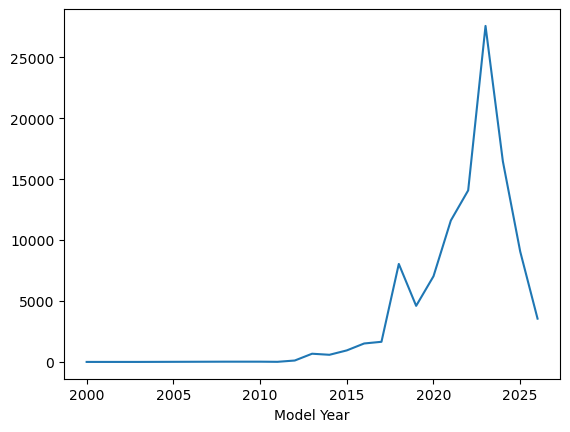

In [68]:
tesla_by_year.plot()

In [82]:
df['2025'] = np.where(df['Model Year'] == "2024",1,0)
df
total_models_in_2025 = df.groupby('Make')['2025'].sum()